The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes.  

Steps of the pipeline :   
**Imputation > creating training and test sets > fitting a classifier or regressor > tuning its parameters > evaluating its performance on new data**

In [86]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
# loading dataset 
diabetes = pd.read_csv('diabetes.csv')

# separate the features and the target
X_features = diabetes.iloc[:,:8]
y_tareget = diabetes.iloc[:,8]

# filling m missing data 
X_features[X_features == 0] = np.nan

# # Print the number of NaNs
print(X_features.isnull().sum())
X_features.head()


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33


In [ ]:
# CASE 1 : Replacing missing values using sklearn.preprocessing Imputer 

from sklearn.preprocessing import Imputer 
from sklearn.model_selection import train_test_split 


imp = Imputer(missing_values= 'NaN', strategy= 'mean', axis=0)
imp.fit(X_features)
X_features = imp.transform(X_features)

#  Check the transformed missing value :
#pd.DataFrame(X_features)

# passing new X_featues with no missing values : 
#X_train, X_test, y_train, y_test = train_test_split(X_features, y_tareget, test_size = 0.4, random_state = 42)


In [145]:
# CASE 2 : Imputing missing data in a ML Pipeline with two steps: the imputation step, followed by the instantiation of a classifier :  
# the Support Vector Machine, or SVM : 

# Import the Imputer module
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report

# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC() 

# Setup the pipeline with the required steps: imputation,  instantiation of a classifier
steps = [('imputation', imp),
        ('SVM', clf)]

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_tareget, test_size= 0.3, random_state = 42)

# Fit the pipeline to the train set
pipeline.fit(X_train,y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

          0       0.65      1.00      0.79       151
          1       0.00      0.00      0.00        80

avg / total       0.43      0.65      0.52       231



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [55]:
# Using K-NN : 

from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.metrics import classification_report
from  sklearn.metrics import confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X_features, y_tareget, test_size = 0.4, random_state = 42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors= 6)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# measuring model performance using accuracy score: 
print(knn.score(X_test,y_test))

# mesuring model performance, generating the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("By analyzing the confusion matrix and classification report, you can get a much better understanding of your classifier's performance")


0.7207792207792207
[[176  30]
 [ 56  46]]
             precision    recall  f1-score   support

          0       0.76      0.85      0.80       206
          1       0.61      0.45      0.52       102

avg / total       0.71      0.72      0.71       308

By analyzing the confusion matrix and classification report, you can get a much better understanding of your classifier's performance


In [101]:
#Hyperparameter tuning with GridSearchCV: 

from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors' : np.arange(1,50)}

knnx = KNeighborsClassifier()
knnx_cv = GridSearchCV(knnx, param_grid, cv=5) 
knnx_cv.fit(X_features, y_tareget)
print(knnx_cv.best_params_)
print(knnx_cv.best_score_)

{'n_neighbors': 14}
0.7578125


In [73]:
# Using logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Definig the model 
logreg = LogisticRegression()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_features, y_tareget, test_size=0.4, random_state = 42)

# training the model : 
logreg.fit(X_train, y_train)

#predicting on test
y_pred = logreg.predict(X_test)

#Measuring performance of the model: 
print(logreg.score(X_test, y_pred)) # not sure, the other scores take y_test, y_pred.

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
[[174  32]
 [ 36  66]]
             precision    recall  f1-score   support

          0       0.83      0.84      0.84       206
          1       0.67      0.65      0.66       102

avg / total       0.78      0.78      0.78       308



#### Hyperparameter tuning using logistic regression : C & Penalty

Logistic regression also has a regularization parameter: C.  
C controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large C can lead to an overfit model, while a small C can lead to an underfit model.
In addition to C, logistic regression has a 'penalty' hyperparameter which specifies whether to use 'l1' or 'l2' regularization. 

The hyperparameter space for C has been setup for you. Your job is to use GridSearchCV and logistic regression to find the optimal C in this hyperparameter space. The feature array is available as X and target variable array is available as y.

In [107]:
# 1- Hyperparameter tuning using logistic regression : C

# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
p_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg_ = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg_, p_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 31.622776601683793}
Best score is 0.7673913043478261


In [111]:
# 2- Hyperparameter tuning using logistic regression : C and penalty

# Import necessary modules
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_featues,y_tareget test_size=0.4, random_state =42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

#predict on test set 
print(logreg_cv.predict(X_test))


Tuned Logistic Regression Parameter: {'C': 31.622776601683793, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7673913043478261
[0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0
 0 1 0 0 0 1 1 0 0 0 0 1]


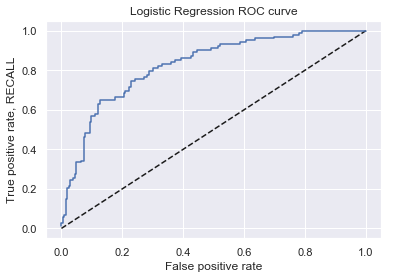

In [75]:
# plotting the ROC curve (performance metric)
from sklearn.metrics import roc_curve 

sns.set()
y_pred_prob = logreg.predict_proba(X_test)[:,1]

#unpacking : 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

#plotting
_= plt.plot([0,1],[0,1], 'k--')
_= plt.plot(fpr, tpr, label='Logistic Regression')
_= plt.xlabel('False positive rate')
_= plt.ylabel('True positive rate, RECALL')
_= plt.title('Logistic Regression ROC curve')
plt.show()

In [106]:
# Area under the curve AUC (performance metric): 

from sklearn.metrics import roc_auc_score 

# Definig the model 
logreg = LogisticRegression()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_features, y_tareget, test_size=0.4, random_state = 42)

# training the model : 
logreg.fit(X_train, y_train)

#predict probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

#AUC score
print(roc_auc_score(y_test, y_pred_prob))


#we can compete AUC using cross validation 
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc')
print(cv_results)

0.8268608414239483
[0.79212363 0.7837699  0.86851567 0.80688238 0.83333333]


In [105]:
# Using Decision Tree 


# hyperparameter turning (max_features, max_depth, and min_samples_leaf)

# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 6}
Best score is 0.7326086956521739
